In [6]:
import numpy as np
import pandas as pd

In [7]:
trxn = pd.read_csv('Retail_Data_Transactions.csv')
trxn

,customer_id,trans_date,tran_amount
0,CS5295,11-Feb-13,35
1,CS4768,15-Mar-15,39
2,CS2122,26-Feb-13,52
3,CS1217,16-Nov-11,99
4,CS1850,20-Nov-13,78
...,...,...,...
124995,CS8433,26-Jun-11,64
124996,CS7232,19-Aug-14,38
124997,CS8731,28-Nov-14,42
124998,CS8133,14-Dec-13,13


In [11]:
response = pd.read_csv('Retail_Data_Response.csv')
response

,customer_id,response
0,CS1112,0
1,CS1113,0
2,CS1114,1
3,CS1115,1
4,CS1116,1
...,...,...
6879,CS8996,0
6880,CS8997,0
6881,CS8998,0
6882,CS8999,0


In [14]:
merged_data = pd.merge(trxn, response, on='customer_id')
merged_data

,customer_id,trans_date,tran_amount,response
0,CS5295,11-Feb-13,35,1
1,CS5295,25-Nov-14,54,1
2,CS5295,22-May-13,37,1
3,CS5295,24-Dec-12,36,1
4,CS5295,22-Mar-13,98,1
...,...,...,...,...
124964,CS8077,18-Sep-11,51,0
124965,CS8077,02-Dec-14,27,0
124966,CS8077,28-Aug-11,30,0
124967,CS8077,01-Mar-15,19,0


In [30]:
merged_data['trans_date'] = pd.to_datetime(merged_data['trans_date'], format='%d-%b-%y')
merged_data

,customer_id,trans_date,tran_amount,response,amount_range
0,CS5295,2013-02-11,35,1,0-50
1,CS5295,2014-11-25,54,1,51-100
2,CS5295,2013-05-22,37,1,0-50
3,CS5295,2012-12-24,36,1,0-50
4,CS5295,2013-03-22,98,1,51-100
...,...,...,...,...,...
124964,CS8077,2011-09-18,51,0,51-100
124965,CS8077,2014-12-02,27,0,0-50
124966,CS8077,2011-08-28,30,0,0-50
124967,CS8077,2015-03-01,19,0,0-50


In [26]:
response_rate = merged_data['response'].mean()
response_rate

0.11076346934039642

In [27]:
bins = [0, 50, 100, 150, 200, 500, 1000]
labels = ['0-50', '51-100', '101-150', '151-200', '201-500', '501-1000']
merged_data['amount_range'] = pd.cut(merged_data['tran_amount'], bins=bins, labels=labels)
merged_data

,customer_id,trans_date,tran_amount,response,amount_range
0,CS5295,11-Feb-13,35,1,0-50
1,CS5295,25-Nov-14,54,1,51-100
2,CS5295,22-May-13,37,1,0-50
3,CS5295,24-Dec-12,36,1,0-50
4,CS5295,22-Mar-13,98,1,51-100
...,...,...,...,...,...
124964,CS8077,18-Sep-11,51,0,51-100
124965,CS8077,02-Dec-14,27,0,0-50
124966,CS8077,28-Aug-11,30,0,0-50
124967,CS8077,01-Mar-15,19,0,0-50


In [28]:
response_rate_by_amount_range = merged_data.groupby('amount_range')['response'].mean()
response_rate_by_amount_range

amount_range
0-50        0.089024
51-100      0.118703
101-150     0.133644
151-200          NaN
201-500          NaN
501-1000         NaN
Name: response, dtype: float64

In [31]:
merged_data['year'] = merged_data['trans_date'].dt.year
response_rate_by_year = merged_data.groupby('year')['response'].mean()
response_rate_by_year

year
2011    0.098397
2012    0.101350
2013    0.118632
2014    0.125458
2015    0.085145
Name: response, dtype: float64

In [32]:
avg_tran_amount = merged_data.groupby('customer_id')['tran_amount'].mean().mean()
avg_tran_amount

63.093407707072544

In [33]:
total_tran_amount_by_response = merged_data.groupby('response')['tran_amount'].sum()
total_tran_amount_by_response

response
0    7166830
1     955548
Name: tran_amount, dtype: int64

In [34]:
transaction_frequency_by_response = merged_data.groupby('response')['customer_id'].count()
transaction_frequency_by_response

response
0    111127
1     13842
Name: customer_id, dtype: int64

In [35]:
avg_tran_amount_by_response = merged_data.groupby('response')['tran_amount'].mean()
avg_tran_amount_by_response

response
0    64.492248
1    69.032510
Name: tran_amount, dtype: float64

In [36]:
merged_data['month'] = merged_data['trans_date'].dt.to_period('M')
monthly_tran_amount = merged_data.groupby('month')['tran_amount'].sum()
monthly_tran_amount

month
2011-05     98901
2011-06    174527
2011-07    178038
2011-08    188605
2011-09    169173
2011-10    182613
2011-11    166830
2011-12    181326
2012-01    177969
2012-02    170135
2012-03    180453
2012-04    167955
2012-05    178880
2012-06    172933
2012-07    178964
2012-08    179164
2012-09    174813
2012-10    181621
2012-11    178998
2012-12    173657
2013-01    181729
2013-02    160233
2013-03    181389
2013-04    173642
2013-05    185826
2013-06    176813
2013-07    180983
2013-08    180031
2013-09    176830
2013-10    181521
2013-11    177341
2013-12    180802
2014-01    184554
2014-02    154151
2014-03    179804
2014-04    174149
2014-05    169555
2014-06    172741
2014-07    179026
2014-08    178975
2014-09    173385
2014-10    179303
2014-11    174855
2014-12    174010
2015-01    179837
2015-02    160509
2015-03     94829
Freq: M, Name: tran_amount, dtype: int64

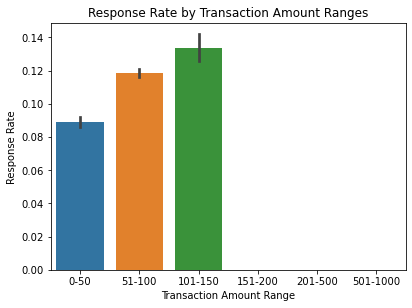

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 10))

# 1. Response Rate by Transaction Amount Ranges
plt.subplot(2, 2, 1)
sns.barplot(x=merged_data['amount_range'], y=merged_data['response'])
plt.title('Response Rate by Transaction Amount Ranges')
plt.xlabel('Transaction Amount Range')
plt.ylabel('Response Rate')
plt.show()

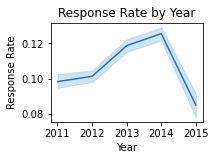

In [41]:
plt.subplot(2, 2, 2)
sns.lineplot(x=merged_data['year'], y=merged_data['response'])
plt.title('Response Rate by Year')
plt.xlabel('Year')
plt.ylabel('Response Rate')
plt.show()

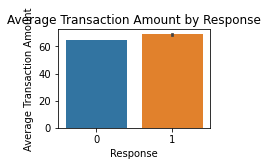

In [44]:
plt.subplot(2, 2, 3)
sns.barplot(x=merged_data['response'], y=merged_data['tran_amount'])
plt.title('Average Transaction Amount by Response')
plt.xlabel('Response')
plt.ylabel('Average Transaction Amount')
plt.show()

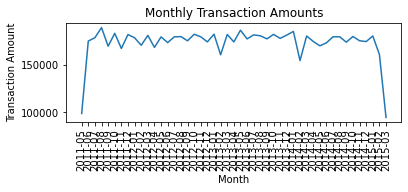

In [57]:
monthly_tran_amount = merged_data.groupby('month')['tran_amount'].sum().reset_index()
plt.subplot(2, 1, 2)
sns.lineplot(x=monthly_tran_amount['month'].astype(str), y=monthly_tran_amount['tran_amount'])
plt.title('Monthly Transaction Amounts')
plt.xlabel('Month')
plt.ylabel('Transaction Amount')
plt.xticks(rotation=90)
plt.show()

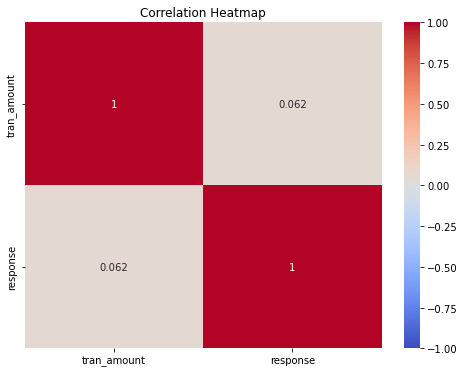

In [58]:
correlation_matrix = merged_data[['tran_amount', 'response']].corr()

plt.figure(figsize=(8, 6))

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap')

plt.show()